<a href="https://colab.research.google.com/github/rsekola/Financial_inclusion_dataset.csv/blob/main/Projet_d'apprentissage_automatique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
# Lecture du CSV sans header
df = pd.read_csv('/content/Movie_classification.csv', header=None)

# Vérification du nombre de colonnes dans le CSV
print("Nombre de colonnes dans le CSV :", df.shape[1])

# Liste des noms de colonnes (19 noms au total)
column_names = [
    'Marketing_expense', 'Production_expense', 'Multiplex_coverage', 'Budget',
    'Movie_length', 'Lead_Actor_Rating', 'Lead_Actress_rating', 'Director_rating',
    'Producer_rating', 'Critic_rating', 'Trailer_views', '3D_available',
    'Time_taken', 'Twitter_hastags', 'Genre', 'Avg_age_actors',
    'Num_multiplex', 'Collection', 'Start_Tech_Oscar'
]

# Si on souhaite supprimer la première colonne (index 0)
df = df.iloc[:, 1:]  # on garde toutes sauf la première

# Ajustement de la liste des noms de colonnes pour correspondre au nombre réel de colonnes
df.columns = column_names[1:]  # on enlève le premier nom pour correspondre aux 18 colonnes restantes

# Affichage du DataFrame
print("Aperçu des 5 premières lignes du jeu de données :")
print(df.head())

print("\nInformations sur le jeu de données :")
df.info()


Nombre de colonnes dans le CSV : 19
Aperçu des 5 premières lignes du jeu de données :
   Production_expense  Multiplex_coverage     Budget  Movie_length  \
0  Production expense  Multiplex coverage     Budget  Movie_length   
1               59.62               0.462  36524.125         138.7   
2               69.14               0.531  35668.655         152.4   
3               69.14               0.531  39912.675         134.6   
4               59.36               0.542   38873.89         119.3   

    Lead_Actor_Rating  Lead_Actress_rating  Director_rating  Producer_rating  \
0  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  Producer_rating   
1               7.825                8.095             7.91            7.995   
2               7.505                 7.65             7.44             7.47   
3               7.485                 7.57            7.495            7.515   
4               6.895                7.035             6.92             7.02   

   Critic_ra

In [6]:
# Encodage One-Hot pour 'Genre'
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)

print("\nAperçu des colonnes après encodage One-Hot :")
print(df.head())
print("\nNouvelles colonnes de Genre :")
print([col for col in df.columns if 'Genre' in col])


Aperçu des colonnes après encodage One-Hot :
   Production_expense  Multiplex_coverage     Budget  Movie_length  \
0  Production expense  Multiplex coverage     Budget  Movie_length   
1               59.62               0.462  36524.125         138.7   
2               69.14               0.531  35668.655         152.4   
3               69.14               0.531  39912.675         134.6   
4               59.36               0.542   38873.89         119.3   

    Lead_Actor_Rating  Lead_Actress_rating  Director_rating  Producer_rating  \
0  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  Producer_rating   
1               7.825                8.095             7.91            7.995   
2               7.505                 7.65             7.44             7.47   
3               7.485                 7.57            7.495            7.515   
4               6.895                7.035             6.92             7.02   

   Critic_rating  Trailer_views  ...  Time_taken  Tw

In [7]:
# Séparer les caractéristiques (X) et la variable cible (y)
X = df.drop('Start_Tech_Oscar', axis=1)
y = df['Start_Tech_Oscar']

print(f"\nForme de X (Caractéristiques) : {X.shape}")
print(f"Forme de y (Cible) : {y.shape}")


Forme de X (Caractéristiques) : (507, 20)
Forme de y (Cible) : (507,)


In [9]:
# Supposons que ta colonne cible est 'Start_Tech_Oscar'
y = df['Start_Tech_Oscar']

# Sélection des features (toutes les colonnes sauf la cible)
X = df.drop('Start_Tech_Oscar', axis=1)

# Conversion en numérique si certaines colonnes sont encore des strings
X = X.apply(pd.to_numeric, errors='coerce')

# Remplacer les valeurs manquantes par la moyenne pour chaque colonne
X = X.fillna(X.mean())

# Standardisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en ensembles d'entraînement et de test (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"\nForme de X_train : {X_train.shape}")
print(f"Forme de X_test : {X_test.shape}")
print(f"Forme de y_train : {y_train.shape}")
print(f"Forme de y_test : {y_test.shape}")

print("\nLe prétraitement des données est terminé. Les ensembles X_train et y_train sont prêts pour l'entraînement du modèle.")



Forme de X_train : (405, 20)
Forme de X_test : (102, 20)
Forme de y_train : (405,)
Forme de y_test : (102,)

Le prétraitement des données est terminé. Les ensembles X_train et y_train sont prêts pour l'entraînement du modèle.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [11]:
print(df.columns)

Index(['Production_expense', 'Multiplex_coverage', 'Budget', 'Movie_length',
       'Lead_Actor_Rating', 'Lead_Actress_rating', 'Director_rating',
       'Producer_rating', 'Critic_rating', 'Trailer_views', '3D_available',
       'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex',
       'Collection', 'Start_Tech_Oscar', 'Genre_Comedy', 'Genre_Drama',
       'Genre_Genre', 'Genre_Thriller'],
      dtype='object')


In [13]:
# Convertir les colonnes numériques en float
numeric_cols = [
    'Production_expense', 'Budget', 'Multiplex_coverage', 'Movie_length',
    'Lead_Actor_Rating', 'Lead_Actress_rating', 'Director_rating',
    'Producer_rating', 'Critic_rating', 'Trailer_views', '3D_available',
    'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex', 'Collection'
]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Remplacer les NaN par la moyenne de chaque colonne
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Maintenant on peut créer les nouvelles features
df['Total_expense'] = df['Production_expense'] + df['Budget']
df['Coverage_per_multiplex'] = df['Multiplex_coverage'] / df['Num_multiplex']
df['Budget_per_minute'] = df['Budget'] / df['Movie_length']
df['Lead_cast_rating'] = (df['Lead_Actor_Rating'] + df['Lead_Actress_rating']) / 2
df['Team_rating'] = df['Director_rating'] + df['Producer_rating'] + df['Critic_rating']
df['Social_popularity'] = df['Trailer_views'] + df['Twitter_hastags']
df['ROI'] = df['Collection'] / df['Budget']
df['Movie_length_hours'] = df['Movie_length'] / 60
df['Popular_3D'] = ((df['3D_available'] == 1) & (df['Trailer_views'] > df['Trailer_views'].mean())).astype(int)

print("Exemple de nouvelles features ajoutées :")
print(df[['Total_expense', 'Coverage_per_multiplex', 'Lead_cast_rating', 'Social_popularity',
          'ROI', 'Movie_length_hours', 'Popular_3D']].head())


Exemple de nouvelles features ajoutées :
   Total_expense  Coverage_per_multiplex  Lead_cast_rating  Social_popularity  \
0   34988.417579                0.000817          8.099807       450121.54751   
1   36583.745000                0.000935          7.960000       527590.84000   
2   35737.795000                0.001149          7.577500       494298.45600   
3   39981.815000                0.001159          7.527500       549073.40000   
4   38933.250000                0.001148          6.965000       516504.34400   

        ROI  Movie_length_hours  Popular_3D  
0  1.290640            2.367915           0  
1  1.314200            2.311667           0  
2  1.211147            2.540000           0  
3  1.738796            2.243333           0  
4  1.718377            1.988333           0  


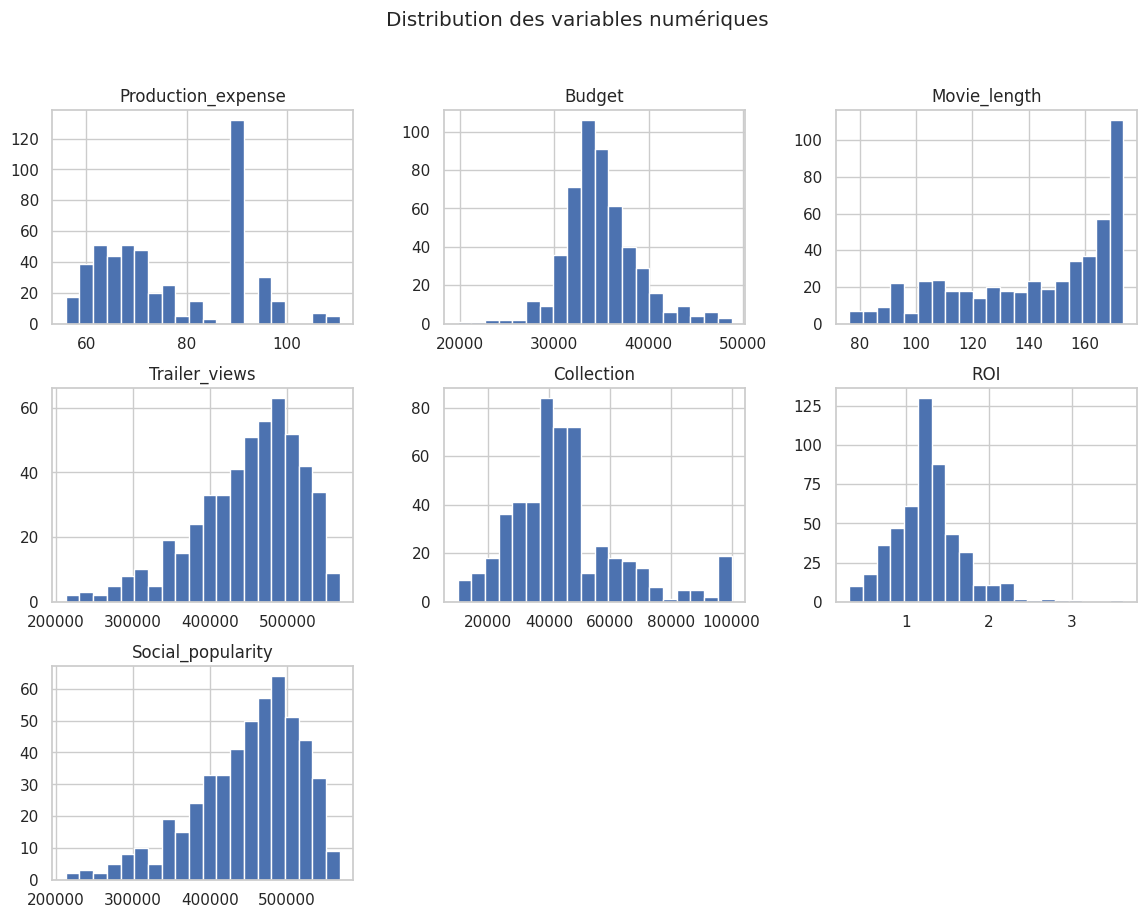

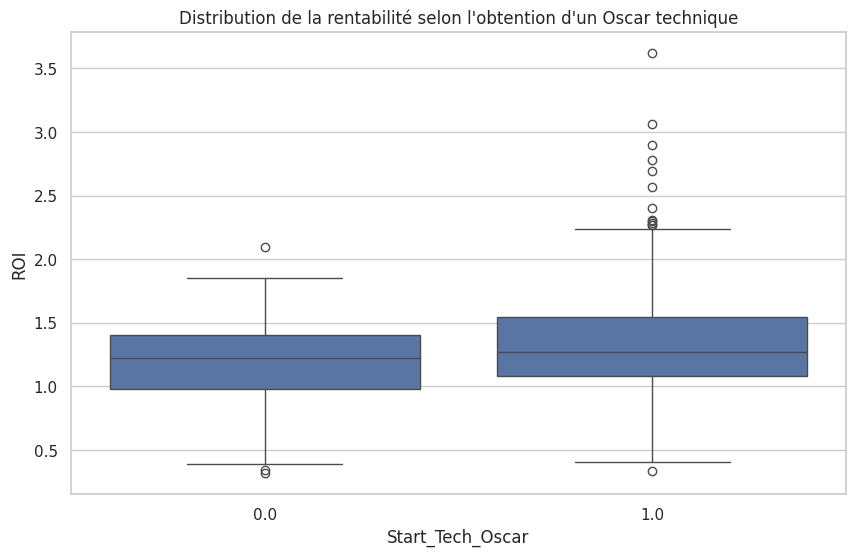

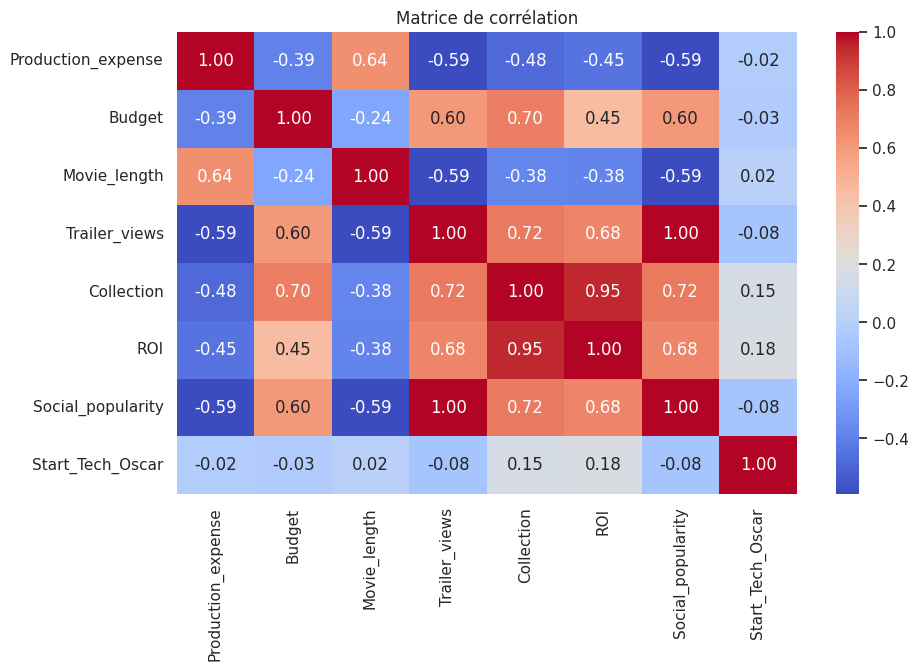

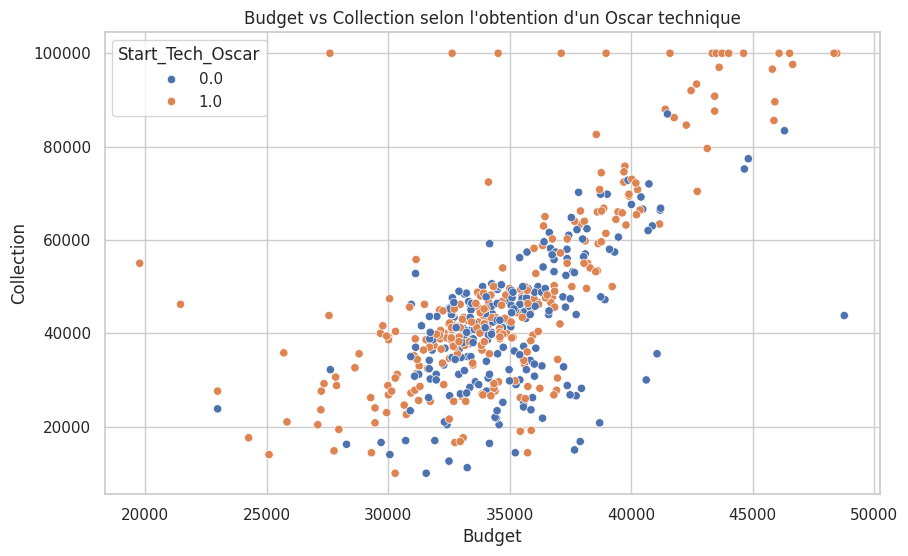

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# Convertir la cible en numérique si nécessaire (0 ou 1)
df['Start_Tech_Oscar'] = pd.to_numeric(df['Start_Tech_Oscar'], errors='coerce')

# 1️⃣ Distribution des variables numériques
numeric_cols = ['Production_expense', 'Budget', 'Movie_length', 'Trailer_views', 'Collection', 'ROI', 'Social_popularity']
df[numeric_cols].hist(bins=20, figsize=(14,10))
plt.suptitle("Distribution des variables numériques")
plt.show()

# 2️⃣ Relation entre la rentabilité (ROI) et l'obtention d'un Oscar technique
sns.boxplot(x='Start_Tech_Oscar', y='ROI', data=df)
plt.title("Distribution de la rentabilité selon l'obtention d'un Oscar technique")
plt.show()

# 3️⃣ Corrélation entre les features et la cible
corr_matrix = df[numeric_cols + ['Start_Tech_Oscar']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# 4️⃣ Scatter plot Budget vs Collection selon l'obtention d'un Oscar technique
sns.scatterplot(x='Budget', y='Collection', hue='Start_Tech_Oscar', data=df)
plt.title("Budget vs Collection selon l'obtention d'un Oscar technique")
plt.show()



In [17]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes dans Start_Tech_Oscar :", df['Start_Tech_Oscar'].isnull().sum())

# Supprimer les lignes avec NaN dans la cible
df = df.dropna(subset=['Start_Tech_Oscar'])

# Convertir la cible en numérique (0/1)
df['Start_Tech_Oscar'] = pd.to_numeric(df['Start_Tech_Oscar'], errors='coerce')


Valeurs manquantes dans Start_Tech_Oscar : 1


In [18]:
# Séparation des données
X = df.drop('Start_Tech_Oscar', axis=1)
y = df['Start_Tech_Oscar']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Séparation des données
X = df.drop('Start_Tech_Oscar', axis=1)
y = df['Start_Tech_Oscar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle
rf = RandomForestClassifier(random_state=42)

# Validation croisée
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Précision moyenne en CV : {cv_scores.mean():.2f}")

# Réglage simple des hyperparamètres (optionnel)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Évaluation sur l'ensemble de test
y_pred = best_rf.predict(X_test)
print("\nAccuracy sur le test :", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Précision moyenne en CV : 0.65

Accuracy sur le test : 0.6764705882352942

Matrice de confusion :
 [[24 18]
 [15 45]]

Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.62      0.57      0.59        42
         1.0       0.71      0.75      0.73        60

    accuracy                           0.68       102
   macro avg       0.66      0.66      0.66       102
weighted avg       0.67      0.68      0.67       102



Projet : Prédiction des Oscars techniques pour les films
J’ai utilisé le dataset Movie_classification.csv, contenant budget, dépenses, durée, notes du casting, popularité et genres, avec comme cible Start_Tech_Oscar.
Le projet consiste à prédire si un film obtiendra un Oscar technique.
J’ai nettoyé les données, créé des features comme ROI et Social_popularity, et visualisé les distributions et relations clés.
Pour la classification binaire, j’ai choisi Random Forest/Gradient Boosting, évalué avec validation croisée, matrice de confusion et rapport de classification.
Les principales difficultés étaient les NaN et les colonnes numériques encodées en texte, résolues par nettoyage et conversion.